In [1]:
import SimpleITK as sitk
import numpy as np
import pandas
import os
import glob
import tensorflow as tf
import gc
from tensorflow import keras
from tensorflow.keras import layers
import random
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage import color
from numpy import newaxis
import csv
import sys
from scipy.ndimage import zoom
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from keras.layers import *
import cv2
from keras.preprocessing import image
import pickle


In [2]:
pickle_in = open("X-randomcrop.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("y-randomcrop.pickle", "rb")
y = pickle.load(pickle_in)
# pickle_in = open("data.pickle", "rb")
# data = pickle.load(pickle_in)

In [3]:
X = np.asarray(X)
y = np.asarray(y)
X = X.reshape(-1, 64, 64)
print(X.shape)
print(y.shape)

(423, 64, 64)
(423,)


In [4]:
X

array([[[-1025,  -969,  -800, ...,  -944,  -822,  -915],
        [ -967,  -952,  -996, ...,  -880,  -920, -1021],
        [ -910,  -976,  -958, ...,  -980,  -926,  -922],
        ...,
        [ -937,  -899,  -963, ...,  -912,  -950,  -896],
        [ -920,  -899,  -965, ...,  -989,  -823,  -864],
        [-1026,  -986,  -904, ...,  -980,  -957,  -917]],

       [[ -710,  -951,  -901, ...,  -668,   -75,    63],
        [ -716, -1044,  -971, ...,  -750,  -173,   137],
        [ -960,  -984,  -650, ...,  -843,  -271,   -50],
        ...,
        [ -976,  -820,  -871, ...,   -45,    10,    26],
        [ -821,  -872,  -819, ...,     7,  -125,   -50],
        [ -878,  -825,  -830, ...,   -50,   -50,    79]],

       [[  385,   368,   371, ...,  -668,  -858,  -807],
        [  481,   439,   253, ...,  -711,  -784,  -943],
        [   90,   248,   -72, ...,  -826,  -900,  -748],
        ...,
        [  255,   167,   118, ...,  -844,  -904, -1001],
        [  131,   185,   155, ...,  -848,  -8

In [5]:
print('Type of X:', type(X))
print('Type of y:', type(y))


Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>


<ipython-input-6-a45c564a4914>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(5 / columns + 1, columns, i + 1)


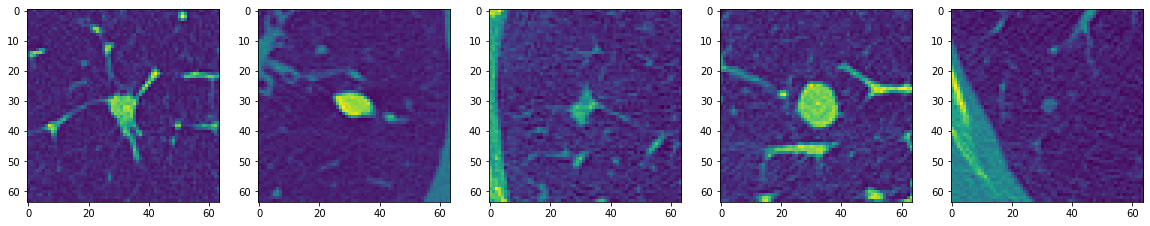

In [6]:
import matplotlib.pyplot as plt # to plot inage, graph
%matplotlib inline

plt.figure(figsize=(20,10))
columns = 5
for i in range(5):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i],interpolation='nearest')

In [7]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
X[0].shape

(64, 64)

In [9]:
len(X)

423

In [10]:
print('# of Samples:', len(y))
sum1=0
sum2=0
for i in range(len(y)):
    if(y[i]==0):
        sum1=sum1+1
    else:
        sum2=sum2+1
print('# of Non-Nodule:', sum1)
print('# of Nodule:', sum2)

# of Samples: 423
# of Non-Nodule: 222
# of Nodule: 201


In [11]:
resized_X = []
for img in X:
    resized_X.append(cv2.resize(img, (64, 64)))

In [12]:
X = np.asarray(X)
X = X.reshape(-1, 64, 64, 1)
print(X.shape)

(423, 64, 64, 1)


In [13]:
X

array([[[[-1025],
         [ -969],
         [ -800],
         ...,
         [ -944],
         [ -822],
         [ -915]],

        [[ -967],
         [ -952],
         [ -996],
         ...,
         [ -880],
         [ -920],
         [-1021]],

        [[ -910],
         [ -976],
         [ -958],
         ...,
         [ -980],
         [ -926],
         [ -922]],

        ...,

        [[ -937],
         [ -899],
         [ -963],
         ...,
         [ -912],
         [ -950],
         [ -896]],

        [[ -920],
         [ -899],
         [ -965],
         ...,
         [ -989],
         [ -823],
         [ -864]],

        [[-1026],
         [ -986],
         [ -904],
         ...,
         [ -980],
         [ -957],
         [ -917]]],


       [[[ -710],
         [ -951],
         [ -901],
         ...,
         [ -668],
         [  -75],
         [   63]],

        [[ -716],
         [-1044],
         [ -971],
         ...,
         [ -750],
         [ -173],
         [  

In [14]:
# normalize the pixel values
X = X / 255.0

In [15]:
IMG_DIM = X.shape[1]
print('IMG_DIM:',IMG_DIM)

IMG_DIM: 64


In [16]:
from sklearn.model_selection import train_test_split

# Split dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=0, shuffle=True)

In [17]:
X_train

array([[[[-3.98431373e+00],
         [-3.79607843e+00],
         [-3.09803922e+00],
         ...,
         [-6.58823529e-01],
         [-6.31372549e-01],
         [-7.84313725e-03]],

        [[-3.52156863e+00],
         [-3.65490196e+00],
         [-3.67450980e+00],
         ...,
         [ 1.49019608e-01],
         [ 7.45098039e-02],
         [ 7.45098039e-02]],

        [[-3.38039216e+00],
         [-3.64705882e+00],
         [-3.80000000e+00],
         ...,
         [ 2.00000000e-01],
         [-7.84313725e-03],
         [-2.98039216e-01]],

        ...,

        [[-3.26666667e+00],
         [-2.70196078e+00],
         [-2.78431373e+00],
         ...,
         [ 2.43137255e-01],
         [-5.56862745e-01],
         [-4.11764706e-01]],

        [[-3.67843137e+00],
         [-3.80784314e+00],
         [-3.55686275e+00],
         ...,
         [ 2.94117647e-01],
         [-8.62745098e-02],
         [-1.49019608e-01]],

        [[-3.50196078e+00],
         [-3.10980392e+00],
         [

In [18]:
print('# of Samples:', len(y_train))
sum1=0
sum2=0
for i in range(len(y_train)):
    if(y_train[i]==0):
        sum1=sum1+1
    else:
        sum2=sum2+1
print('# of Non-Nodule:', sum1)
print('# of Nodule:', sum2)

print('# of Samples:', len(y_test))
sum1=0
sum2=0
for i in range(len(y_test)):
    if(y_test[i]==0):
        sum1=sum1+1
    else:
        sum2=sum2+1
print('# of Non-Nodule:', sum1)
print('# of Nodule:', sum2)

# of Samples: 338
# of Non-Nodule: 177
# of Nodule: 161
# of Samples: 85
# of Non-Nodule: 45
# of Nodule: 40


In [19]:
y_train

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,

In [20]:
adam = Adam(learning_rate=0.0001)
sgd = SGD(learning_rate=0.005)

In [21]:
def model():
    
    input_shape = (64,64,1)
    model = Sequential()
    img_width, img_height = 224, 224

    #convolution layer 1
    model.add(Conv2D(8, kernel_size=(5,5), strides=(1, 1), padding = 'same',
             activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding = 'same'))

    #convolution layer 2
    model.add(Conv2D(16, kernel_size=(5,5), strides=(1, 1), padding = 'same',
             activation='relu'))        

    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding = 'same'))

    model.add(Flatten())

    model.add(Dense(128))
    model.add(Dropout(0.2))

    # readout layer
    model.add(Dense(2))

    model.add(Activation('softmax'))


    model.compile(loss='sparse_categorical_crossentropy', # or categorical_crossentropy
                  optimizer='sgd',
                  metrics=['accuracy'])

    return model

model=model()




In [22]:
#fitting the model with train data and validating on validation data
history=model.fit(X_train,y_train, 
                        epochs=20,
                        verbose=1,
                        validation_split=0.1)

Epoch 1/20
10/10 [==============================] - 2s 128ms/step - loss: 1.1614 - accuracy: 0.4638 - val_loss: 0.7177 - val_accuracy: 0.5882
Epoch 2/20
10/10 [==============================] - 1s 82ms/step - loss: 0.6655 - accuracy: 0.6217 - val_loss: 0.7028 - val_accuracy: 0.5882
Epoch 3/20
10/10 [==============================] - 1s 84ms/step - loss: 0.6269 - accuracy: 0.6809 - val_loss: 0.6704 - val_accuracy: 0.6471
Epoch 4/20
10/10 [==============================] - 1s 84ms/step - loss: 0.5935 - accuracy: 0.7072 - val_loss: 0.6251 - val_accuracy: 0.7353
Epoch 5/20
10/10 [==============================] - 1s 83ms/step - loss: 0.5625 - accuracy: 0.7072 - val_loss: 0.6180 - val_accuracy: 0.7353
Epoch 6/20
10/10 [==============================] - 1s 84ms/step - loss: 0.5220 - accuracy: 0.7928 - val_loss: 0.7089 - val_accuracy: 0.5588
Epoch 7/20
10/10 [==============================] - 1s 78ms/step - loss: 0.5474 - accuracy: 0.7566 - val_loss: 0.6304 - val_accuracy: 0.7059
Epoch 8/20
1

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

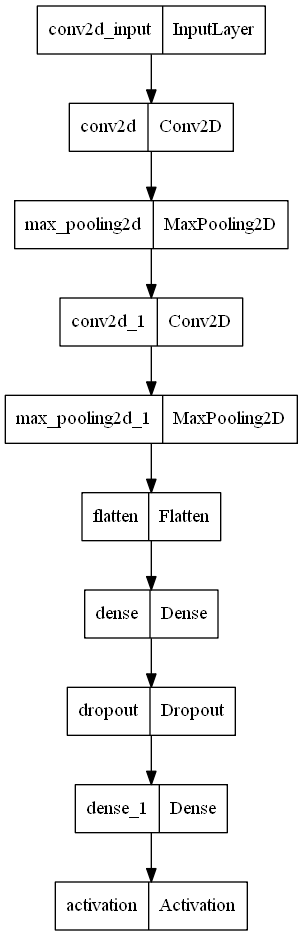

In [24]:
import keras
import pydot
import pydotplus
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

In [25]:
# Evaluate performance
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 46ms/step - loss: 0.5012 - accuracy: 0.7765


[0.5012121796607971, 0.7764706015586853]

In [26]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred = y_pred.reshape(-1)

In [27]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [28]:
y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [39]:
non_test=([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

Sensitivity :  0.8653846153846154
Specificity :  0.8484848484848485
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        52
           1       0.80      0.85      0.82        33

    accuracy                           0.86        85
   macro avg       0.85      0.86      0.85        85
weighted avg       0.86      0.86      0.86        85



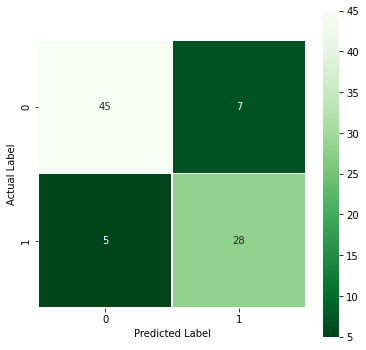

In [41]:
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score



cm = confusion_matrix(non_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='.0f', square=True, linewidths=.5, cmap='Greens_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png')
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)


print(sklearn.metrics.classification_report(non_test, y_pred))

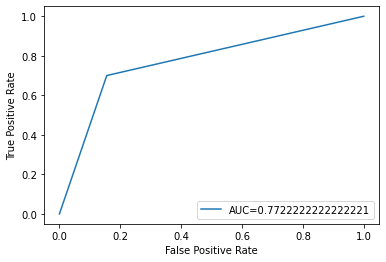

<Figure size 432x288 with 0 Axes>

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
plt.savefig('auc.png')


In [32]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

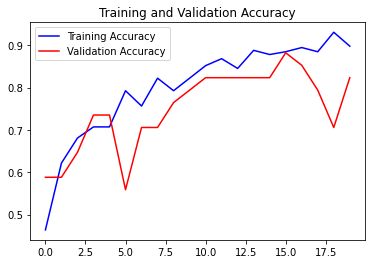

<Figure size 432x288 with 0 Axes>

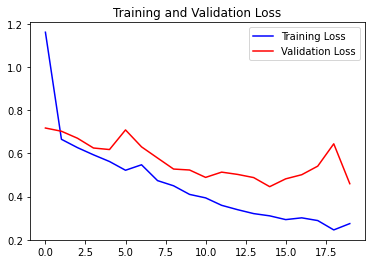

In [33]:
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()